In [1]:
from keras.datasets.mnist import load_data
# ((訓練圖片, 訓練答案), (測試圖片, 測試答案))
(x_train, y_train), (x_test,y_test) = load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


In [2]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


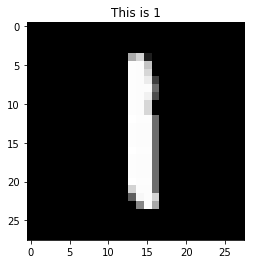

In [3]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
c = random.randint(0, 59999)
plt.title("This is " + str(y_train[c]))
plt.imshow(x_train[c], cmap="gray")

In [4]:
import pandas as pd
pd.DataFrame(x_train[c])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,171,211,31,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,253,252,195,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,253,252,215,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,253,252,236,62,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,253,252,252,108,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,253,252,241,77,0,0,0,0,0,0,0,0,0,0,0


In [5]:
from keras.models import Sequential
# 全連結層: Fully-Connected, Dense
from keras.layers import Dense
mlp = Sequential()
# 784 * 256(原本) + 256(bias) = 200960
mlp.add(Dense(256, activation="relu", input_dim=784))
# 256 * 10(原本) + 10(bias) = 2570
mlp.add(Dense(10, activation="softmax"))
mlp.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [0]:
# loss: 我們用什麼方式來算跟正確答案的距離
# 機率: 一個輸出(binary_crossentropy) 多個輸出(categorical_crossentropy)
# optimizer: 調整的時候如何可以調得更好
# adam包含兩種: 1)動量優化: 速度累積 + 摩擦力  2)步長優化: 一開始大步, 後來小步
# metrics: 你除了loss以外還要看到什麼衡量標準
mlp.compile(loss="categorical_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])

In [0]:
# 資料預處理
# 圖片: 1) 必須先拉成1D(reshape)   
# 假設一個輸入區間 -> 根據區間隨機一開始的參數
# tensorflow喜好區間: -1~1   0~1
# 基礎: 0-255 -> 0-1
x_train_norm = x_train.reshape(60000, 784) / 255
x_test_norm = x_test.reshape(10000, 784) / 255
# x_test_norm[0]

In [12]:
# 答案: 2 -> 十個機率 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
# One-Hot Encoding
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
# show一筆給你看
print("原本:", y_train[0])
print("轉換:", y_train_cat[0])

原本: 5
轉換: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
mlp.fit